多元線性回歸適用於探索線性關係，而多項式回歸則適用於探索非線性關係，通過添加高次項來擴展特徵空間以更好地擬合數據。

優點：

- 處理非線性問題：可以處理變量之間的非線性關係。
- 靈活性：通過調整多項式的階數來提高模型的擬合能力。

缺點：

- 過擬合風險：多項式階數過高容易導致過擬合，模型在訓練數據上表現很好，但在測試數據上表現差。
- 計算複雜度增加：隨著階數增加，計算量和模型複雜度顯著增加。
- 解釋困難：高階多項式模型的結果解釋變得困難。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
dataset = pd.read_csv('Position_Salaries.csv')
column_names = dataset.columns.tolist()
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

column_names

['職位', '級別', '薪水']

## Training the Linear Regression model on the whole dataset

In [7]:
# 多元線性回歸
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [24]:
# 多項式回歸
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Visualising the Linear Regression results

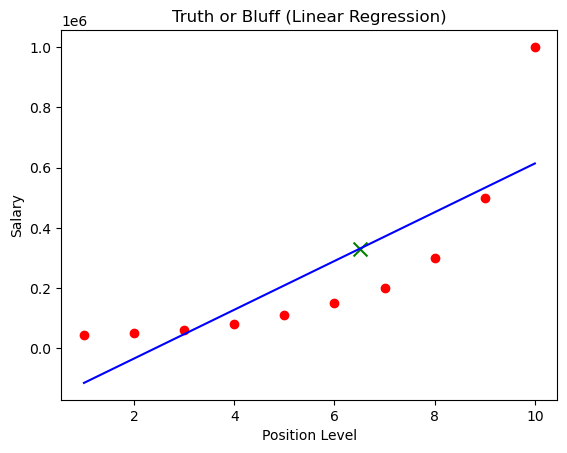

In [30]:
y_pred_6_5 = lin_reg.predict([[6.5]])

plt.scatter(X, y, color = 'red')
plt.scatter(6.5, y_pred_6_5, color='green', marker='x', s=100)  # 預測點 6.5
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

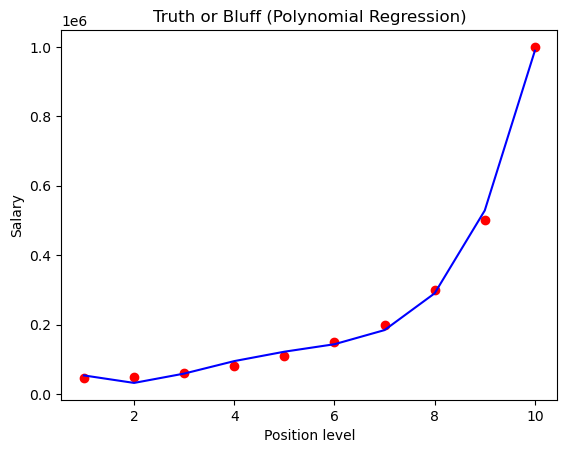

In [27]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

第二段程式碼中的 X_grid 設定更密集，使得在繪製多項式回歸曲線時能夠更精細地展現曲線的形狀，呈現出更加圓滑的效果。

[1] [2] [3] [4] [5] [6] [7] [8] [9] [10]
[1.] [1.1] [1.2] [1.3] [1.4] [1.5] [1.6] [1.7] [1.8] [1.9] [2.] [2.1] [2.2] [2.3] [2.4] [2.5] [2.6] [2.7] [2.8] [2.9] [3.] [3.1] [3.2] [3.3] [3.4] [3.5] [3.6] [3.7] [3.8] [3.9] [4.] [4.1] [4.2] [4.3] [4.4] [4.5] [4.6] [4.7] [4.8] [4.9] [5.] [5.1] [5.2] [5.3] [5.4] [5.5] [5.6] [5.7] [5.8] [5.9] [6.] [6.1] [6.2] [6.3] [6.4] [6.5] [6.6] [6.7] [6.8] [6.9] [7.] [7.1] [7.2] [7.3] [7.4] [7.5] [7.6] [7.7] [7.8] [7.9] [8.] [8.1] [8.2] [8.3] [8.4] [8.5] [8.6] [8.7] [8.8] [8.9] [9.] [9.1] [9.2] [9.3] [9.4] [9.5] [9.6] [9.7] [9.8] [9.9]


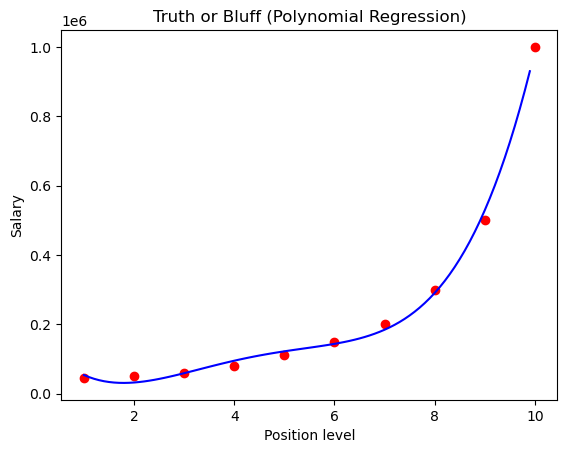

In [29]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

print(*X)
print(*X_grid)

plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Polynomial Regression

In [19]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265152])

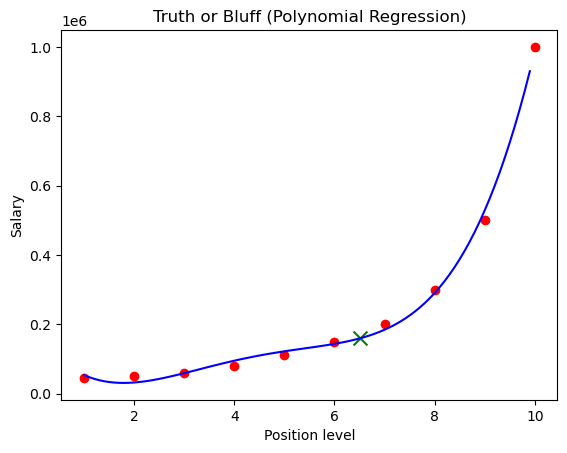

In [20]:
X_grid = np.arange(min(X), max(X), 0.1).reshape(-1, 1)

# 預測所有 X_grid 上的值
y_pred_grid = lin_reg_2.predict(poly_reg.fit_transform(X_grid))

# 預測單獨的點 6.5
y_pred_6_5 = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

plt.scatter(X, y, color='red')  # 原始數據點
plt.plot(X_grid, y_pred_grid, color='blue')  # 預測值的曲線
plt.scatter(6.5, y_pred_6_5, color='green', marker='x', s=100)  # 預測點 6.5

plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
